# Example: Vietnam map

This uses the geopandas library...which requires a slightly tricky installation.

In [1]:
%matplotlib inline
import pandas as pd
from geopandas import GeoSeries, GeoDataFrame
import mplleaflet

the next line just sets the figure size

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0)

##Map shapefile data

I got the shapefile data from http://www.gadm.org/ 
Let's import it into a geopandas dataframe and plot it:

In [3]:
shpfile = r'data\VNM_adm2.shp'
gdf_vnm = GeoDataFrame.from_file(shpfile)

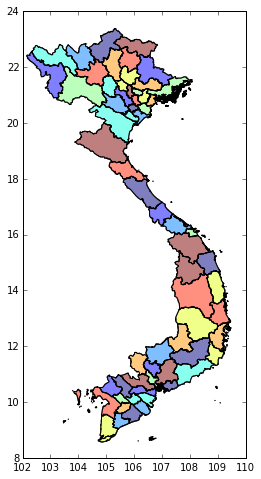

In [4]:
ax=gdf_vnm.plot()

The VARNAME_2 column seems to have the names of the provinces.  Vietnam has 58 provinces and 5 municipalities existing at the same level as provinces.  The provinces are divided into districts (huyện), provincial cities (thành phố trực thuộc tỉnh), and district-level towns (thị xã), which are subdivided into commune-level towns (thị trấn) or communes (xã) [wikipedia](https://en.wikipedia.org/wiki/Provinces_of_Vietnam).

These are the columns and the ones that seem most immediately useful. ID_1 seems to be a region number, ID_2 the province number.

In [5]:
gdf_vnm.columns

Index(['ENGTYPE_2', 'ID_0', 'ID_1', 'ID_2', 'ISO', 'NAME_0', 'NAME_1',
       'NAME_2', 'NL_NAME_2', 'TYPE_2', 'VARNAME_2', 'geometry'],
      dtype='object')

In [6]:
gdf_vnm[['ENGTYPE_2', 'ID_1', 'ID_2', 'VARNAME_2']].head(8)

,ENGTYPE_2,ID_1,ID_2,VARNAME_2
0,Province,1,1,Dong Thap
1,Province,1,2,An Giang
2,Province,1,3,Bac Lieu
3,Province,1,4,Ben Tre
4,City|Municipality|Thanh Pho,1,5,Can Tho
5,Province,1,6,Ca Mau
6,Province,1,7,Hau Giang
7,Province,1,8,Kien Giang


Let's rename a few columns to nicer names.

In [7]:
gdf_vnm = gdf_vnm.rename(columns={'ENGTYPE_2': 'prov_type',
                                  'VARNAME_2': 'prov_name'})

##Merge in Alan's Excel sheet data

To illustrate I've cleaned up one of Alan's excel sheets, saved it as a CSV file and then merged it into the geodataframe above using the province name (**prov_name** ...previously VARNAME_2) variable.

This is FDI data taken from Alan's E04.14.xlsx sheet which has info on foreign direct investment. I've given it nice column names and cleaned it up a bit to make it easier to import.

In [8]:
masterf = r"data\vfdi.csv"
df_fdi = pd.read_csv(masterf)
df_fdi.head()

,prov_name,FDI_projects,reg_capital
0,WHOLE COUNTRY,15932,234121.0
1,Red River Delta,4531,56117.7
2,Ha Noi,2702,22404.0
3,Vinh Phuc,166,2774.2
4,Bac Ninh,416,5890.9


There are several summary rows in the data (e.g. total for 'Whole Country' but these should be dropped with an 'left' merge (i.e. we'll use the province names in the existing geodataframe **gdf_vname** and only import data from the CSV file that have matching province names.

In [9]:
gdf_new = pd.merge(gdf_vnm,df_fdi,on='prov_name',how='left')

In [10]:
gdf_new[['prov_name','FDI_projects']].head(10)

,prov_name,FDI_projects
0,Dong Thap,19
1,An Giang,17
2,Bac Lieu,18
3,Ben Tre,37
4,Can Tho,64
5,Ca Mau,8
6,Hau Giang,17
7,Kien Giang,NaN
8,Long An,499
9,Soc Trang,11


This didn't quite work... for example Kien Giang province... Something went wrong on matching up the columns.. This can probably be fixed by using numeric province names..

But ignoring that, let's now do a colormap based on the number of FDI projects..

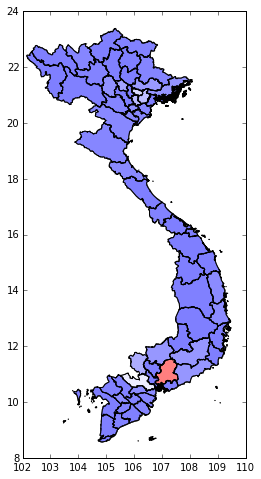

In [13]:
gdf_new.plot(column="FDI_projects",colormap='bwr')